# Revisões de Python e grafos

Um grafo *orientado* e *não pesado* é um par $(V,E)$ onde $V$ é um conjunto finito de vértices e $E$ uma relação binária em $V$, o conjunto de *arcos* ou *arestas* do grafo.

Um grafo *não pesado* pode ser representado usando *listas de adjacências*. Em Python é
possível implementar as ditas usando um dicionário de listas, onde a cada vértice temos associada a sua lista
de adjacentes (vértices directamente ligados através de uma aresta).

Se o grafo for também *não orientado* bastará desdobrar cada aresta em duas adjacências.

Por exemplo, o grafo

<img src="exemplo.png" width=400/>

pode ser armazenado no dicionário `graph` da seguinte forma.

In [11]:
graph = {'OPO': ['LIS', 'FAO', 'MAD', 'FRA'],
         'LIS': ['OPO', 'FAO', 'LON', 'NRT', 'FRA'],
         'FAO': ['OPO', 'LIS'],
         'MAD': ['OPO'],
         'LON': ['LIS', 'NRT', 'FRA'],
         'FRA': ['OPO', 'LON', 'LIS'],
         'NRT': ['LIS', 'LON']}

### Exercício 1
Defina uma função `count_edges` que conta o número de arestas de um grafo representado desta forma.

In [6]:
def count_edges(g):
    counter = 0
    for k in g:
        counter += len(g[k])
    return counter//2

count_edges(graph)

10

Um grafo não orientado pode ser armazenado num ficheiro num formato de texto escrevendo um arco por linha da seguinte forma (conforme conteúdo do ficheiro `exemplo.txt`).

```
OPO LIS
OPO FAO
LIS FAO
MAD OPO
LIS LON
FRA OPO
LIS NRT
LON NRT
LON FRA
LIS FRA
```

Para criar um grafo a partir de um ficheiro armazenado neste formato podemos usar a seguinte função.

In [14]:
def parse(name):
    file = open(name)
    adj = {}
    for l in file:
        o,d = l.split()
        if o not in adj:
            adj[o] = []
        if d not in adj:
            adj[d] = []
        adj[o].append(d)
        adj[d].append(o)
    return(adj)

parse("exemplo.txt")

{'OPO': ['LIS', 'FAO', 'MAD', 'FRA'],
 'LIS': ['OPO', 'FAO', 'LON', 'NRT', 'FRA'],
 'FAO': ['OPO', 'LIS'],
 'MAD': ['OPO'],
 'LON': ['LIS', 'NRT', 'FRA'],
 'FRA': ['OPO', 'LON', 'LIS'],
 'NRT': ['LIS', 'LON']}

Existem muitos algoritmos para analisar grafos. Um exemplo, é o seguinte algoritmo que calcula a *distância* entre
cada par de vértices de um grafo *não pesado*. A distância entre dois vértices é o comprimento do caminho mais curto
entre eles. A função `all_pairs_shortest_paths` devolve todas as distâncias usando um dicionário de dicionários de 
distâncias (no fundo uma matriz de distâncias).

In [15]:
def all_pairs_shortest_paths(adj):
    dist = {}
    for o in adj:
        dist[o] = {}
        for d in adj:
            if o == d:
                dist[o][d] = 0
            else:
                dist[o][d] = float("inf")
        for d in adj[o]:
                dist[o][d] = 1
    for k in adj:
        for o in adj:
            for d in adj:
                if dist[o][d] > dist[o][k] + dist[k][d]:
                    dist[o][d] = dist[o][k] + dist[k][d]
    return dist

all_pairs_shortest_paths(parse("exemplo.txt"))

{'OPO': {'OPO': 0, 'LIS': 1, 'FAO': 1, 'MAD': 1, 'LON': 2, 'FRA': 1, 'NRT': 2},
 'LIS': {'OPO': 1, 'LIS': 0, 'FAO': 1, 'MAD': 2, 'LON': 1, 'FRA': 1, 'NRT': 1},
 'FAO': {'OPO': 1, 'LIS': 1, 'FAO': 0, 'MAD': 2, 'LON': 2, 'FRA': 2, 'NRT': 2},
 'MAD': {'OPO': 1, 'LIS': 2, 'FAO': 2, 'MAD': 0, 'LON': 3, 'FRA': 2, 'NRT': 3},
 'LON': {'OPO': 2, 'LIS': 1, 'FAO': 2, 'MAD': 3, 'LON': 0, 'FRA': 1, 'NRT': 1},
 'FRA': {'OPO': 1, 'LIS': 1, 'FAO': 2, 'MAD': 2, 'LON': 1, 'FRA': 0, 'NRT': 2},
 'NRT': {'OPO': 2, 'LIS': 1, 'FAO': 2, 'MAD': 3, 'LON': 1, 'FRA': 2, 'NRT': 0}}

### Exercício 2
O *diâmetro* de um grafo é a distância entre os seus vértices mais afastados. Defina a função `diameter` que calcula o
diâmetro de um grafo, tirando proveito da função `all_pairs_shortest_paths`.

In [19]:
def diameter(adj):
    dist = all_pairs_shortest_paths(adj)
    diametro = 0
    for k,v in dist.items():
        for key,value in v.items():
            diametro = max(value,diametro)
    return diametro
    
diameter(parse("exemplo.txt"))

3

## Biblioteca `NetworkX` para manipulação de grafos.

A biblioteca `NetworkX` diponibiliza implementações de vários tipos de grafos e de muitos algoritmos para os analisar e visualizar. Para importar esta biblioteca de forma qualificada faz-se o seguinte.

In [23]:
import networkx as nx

O tutorial desta biblioteca pode ser encontrado em https://networkx.github.io/documentation/stable/tutorial.html.

### Exercício 3
Reimplemente a função `parse` passando a usar a implementação de grafos desta biblioteca em vez dos dicionários do python.

In [25]:
def parse(name):
    file = open(name)
    g = nx.Graph()
    
    for l in file:
        o,d  = l.split()
        g.add_edge(o,d)
    file.close()
    return g
graph = parse("exemplo.txt")
nx.to_dict_of_lists(graph) # converte o grafo para um dicionário de listas

{'OPO': ['LIS', 'FAO', 'MAD', 'FRA'],
 'LIS': ['OPO', 'FAO', 'LON', 'NRT', 'FRA'],
 'FAO': ['OPO', 'LIS'],
 'MAD': ['OPO'],
 'LON': ['LIS', 'NRT', 'FRA'],
 'FRA': ['OPO', 'LON', 'LIS'],
 'NRT': ['LIS', 'LON']}

### Exercício 4
Implemente outra versão da função `parse` usando directamente as funções disponibilizadas pelo `NetworkX` para leitura
e escrita em ficheiro, conforme https://networkx.github.io/documentation/stable/reference/readwrite/index.html.

In [26]:
def parse(name):
    return nx.read_edgelist(name)
        
graph = parse("exemplo.txt")
nx.to_dict_of_lists(graph)

{'OPO': ['LIS', 'FAO', 'MAD', 'FRA'],
 'LIS': ['OPO', 'FAO', 'LON', 'NRT', 'FRA'],
 'FAO': ['OPO', 'LIS'],
 'MAD': ['OPO'],
 'LON': ['LIS', 'NRT', 'FRA'],
 'FRA': ['OPO', 'LON', 'LIS'],
 'NRT': ['LIS', 'LON']}

Como referido acima, a vantagem de usar a biblioteca `NetworkX` é que os algoritmos de análise mais usais estão todos já implementados. Por exemplo, para calcular o diâmetro do grafo exemplo basta fazer o seguinte.

In [ ]:
nx.diameter(parse("exemplo.txt"))

### Exercício 5
Utilize a bibliotecas `NetworkX` e `Matplotlib` para desenhar o grafo exemplo, conforme explicado em https://networkx.github.io/documentation/stable/tutorial.html#drawing-graphs.

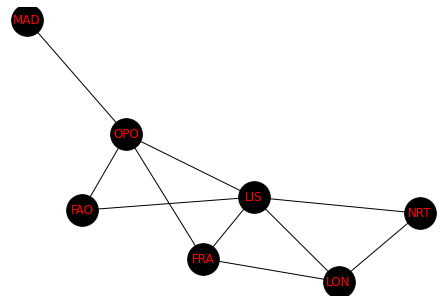

In [47]:
nx.draw(graph,with_labels = True, font_color = 'red', node_color = "black", node_size = 1000)

### Exercício 6
A biblioteca `NetworkX` disponibiliza também vários geradores de grafos pré-definidos, coforme documentação em https://networkx.github.io/documentation/stable/reference/generators.html.
    Use esses geradores para criar um grafo degenerado que é um ciclo com 100 vértices. 
    Desenhe esse grafo e calcule o seu diâmetro 
    (que deverá ser 50).

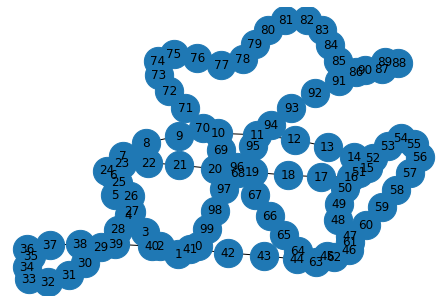

In [53]:
g = nx.cycle_graph(100)
nx.draw(g, node_size = 800, with_labels = True)

In [54]:
nx.diameter(g)

50